In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

In [2]:
df = pd.read_csv('Final1.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Production', 'movie_id', 'Animation',
       'Comedy', 'Family', 'Adventure', 'Fantasy', 'Romance', 'Drama',
       'Action', 'Crime', 'Thriller', 'Horror', 'History', 'Science Fiction',
       'Mystery', 'War', 'Music', 'Foreign', 'Western', 'Documentary',
       'TV Movie', 'imdb_id', 'revenue1', 'budget1', 'Cast 1', 'Cast 2',
       'adult', 'popularity', 'vote_average', 'vote_count', 'release_date',
       'Month', 'Year'],
      dtype='object')

In [4]:
df1 = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'movie_id', 'release_date'], axis=1)

In [7]:
df1.describe().T


,count,mean,std,min,25%,50%,75%,max
Production,3599.0,2.234510e+00,1.120092e+00,1.000000,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00
Animation,3598.0,6.086715e-02,2.391197e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Comedy,3598.0,3.882713e-01,4.874246e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
Family,3598.0,1.286826e-01,3.348949e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Adventure,3598.0,1.912173e-01,3.933145e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Fantasy,3598.0,1.064480e-01,3.084531e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Romance,3598.0,1.792663e-01,3.836284e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Drama,3598.0,4.305170e-01,4.952174e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
Action,3598.0,2.709839e-01,4.445296e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
Crime,3598.0,1.584213e-01,3.651864e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [6]:
df_Y={'Low':1,'Moderate':2,'High':3}
df1[['Cast 1', 'Cast 2']] = df[['Cast 1', 'Cast 2']].apply(lambda x: x.map(df_Y))

In [7]:
df1[['Cast 1','Cast 2']] = df1[['Cast 1','Cast 2']].fillna(0)

In [8]:
df1.isnull().sum()

Production         0
Animation          1
Comedy             1
Family             1
Adventure          1
Fantasy            1
Romance            1
Drama              1
Action             1
Crime              1
Thriller           1
Horror             1
History            1
Science Fiction    1
Mystery            1
War                1
Music              1
Foreign            1
Western            1
Documentary        1
TV Movie           1
imdb_id            0
revenue1           0
budget1            0
Cast 1             0
Cast 2             0
adult              0
popularity         0
vote_average       0
vote_count         0
Month              0
Year               0
dtype: int64

In [9]:
df1.dropna(inplace=True)

In [10]:
df1['Age'] = 2019 - df1['Year']

In [11]:
df1.drop(columns=['imdb_id','Year'], axis=1, inplace=True)

In [12]:
df1 = pd.get_dummies(data = df1, columns = ['Month'], drop_first=True)

In [13]:
df1.isnull().sum()

Production         0
Animation          0
Comedy             0
Family             0
Adventure          0
Fantasy            0
Romance            0
Drama              0
Action             0
Crime              0
Thriller           0
Horror             0
History            0
Science Fiction    0
Mystery            0
War                0
Music              0
Foreign            0
Western            0
Documentary        0
TV Movie           0
revenue1           0
budget1            0
Cast 1             0
Cast 2             0
adult              0
popularity         0
vote_average       0
vote_count         0
Age                0
Month_2            0
Month_3            0
Month_4            0
Month_5            0
Month_6            0
Month_7            0
Month_8            0
Month_9            0
Month_10           0
Month_11           0
Month_12           0
dtype: int64

In [14]:
from statsmodels.tools.tools import add_constant
X = df1.drop('revenue1',axis=1)
y = df1.revenue1
col_to_std = X.nunique()[X.nunique()>10].index.to_list() 
X[col_to_std] = (X[col_to_std]-X[col_to_std].mean())/X[col_to_std].std()
y= (y-y.mean())/y.std()
X = add_constant(X)
model = sm.OLS(y,X.astype(int)).fit()

/anaconda3/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               revenue1   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     195.9
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        16:04:03   Log-Likelihood:                -3042.0
No. Observations:                3598   AIC:                             6164.
Df Residuals:                    3558   BIC:                             6412.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.6115      0.054    -11.294      0.000      -0.718      -0.505
Production          0.0454      0.009      5.190      0.000       0.028       0.063
Animation           0.3045      0.050      6.072      0.000       0.206       0.403
Comedy             -0.0504      0.025     -2.047      0.041      -0.099      -0.002
Family              0.1371      0.037      3.703      0.000       0.064       0.210
Adventure           0.1163      0.030      3.898      0.000       0.058       0.175
Fantasy             0.1018      0.033      3.072      0.002       0.037       0.167
Romance             0.1221      0.027      4.481      0.000       0.069       0.176
Drama              -0.1460      0.024     -6.102      0.000      -0.193      -0.099
Action              0.0228      0.027      0.843      0.399      -0.030       0.076
Crime              -0.0400      0.029     -1.366      0.172      -0.097       0.017
Thriller           -0.0129      0.027     -0.484      0.628      -0.065       0.039
Horror             -0.0095      0.036     -0.268      0.789      -0.079       0.060
History             0.0083      0.058      0.144      0.886      -0.105       0.121
Science Fiction    -0.0815      0.034     -2.431      0.015      -0.147      -0.016
Mystery             0.0105      0.037      0.284      0.776      -0.062       0.083
War                 0.0987      0.063      1.562      0.118      -0.025       0.223
Music               0.1229      0.054      2.263      0.024       0.016       0.229
Foreign            -0.0937      0.161     -0.584      0.559      -0.408       0.221
Western            -0.2504      0.084     -2.991      0.003      -0.415      -0.086
Documentary        -0.1652      0.098     -1.686      0.092      -0.357       0.027
TV Movie            0.1764      0.572      0.309      0.758      -0.944       1.297
budget1             0.5799      0.018     32.464      0.000       0.545       0.615
Cast 1              0.1057      0.019      5.472      0.000       0.068       0.144
Cast 2              0.0829      0.021      3.932      0.000       0.042       0.124
adult            1.527e-16   2.65e-16      0.576      0.565   -3.67e-16    6.73e-16
popularity          0.0831      0.011      7.364      0.000       0.061       0.105
vote_average        0.0461      0.016      2.968      0.003       0.016       0.077
vote_count          0.5669      0.016     34.913      0.000       0.535       0.599
Age                -0.1140      0.014     -7.915      0.000      -0.142      -0.086
Month_2             0.0093      0.053      0.176      0.861      -0.095       0.114
Month_3             0.0261      0.051      0.510      0.610      -0.074       0.126
Month_4             0.0570      0.052      1.102      0.270      -0.044       0.158
Month_5             0.1612      0.051      3.139      0.002

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [17]:
X.astype(int)

,const,Production,Animation,Comedy,Family,Adventure,Fantasy,Romance,Drama,Action,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,1,4,0,1,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,4,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,4,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,4,0,0,0,1,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
4,1,4,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
5,1,4,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6,1,4,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
7,1,4,0,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
8,1,4,0,1,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
9,1,4,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [18]:
VIF_result1 = pd.Series([vif(X.astype(int).values,i) for i in range(X.shape[1])],index=X.columns)
VIF_result1[VIF_result1>10]

/anaconda3/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


const    32.833295
dtype: float64

In [19]:
def reg(X,y=y):
    model=sm.OLS(y,X.astype(int))
    model_fit = model.fit()
    print(model_fit.summary())

In [20]:
X=X.drop('Production', axis=1)
reg(X)

                            OLS Regression Results                            
Dep. Variable:               revenue1   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     198.9
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        16:04:07   Log-Likelihood:                -3055.6
No. Observations:                3598   AIC:                             6189.
Df Residuals:                    3559   BIC:                             6431.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.5313      0.052    -

In [21]:
X=X.drop('Comedy', axis=1)
reg(X)

                            OLS Regression Results                            
Dep. Variable:               revenue1   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     204.1
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        16:04:08   Log-Likelihood:                -3057.2
No. Observations:                3598   AIC:                             6190.
Df Residuals:                    3560   BIC:                             6425.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.5633      0.049    -

In [22]:
X=X.drop('Fantasy', axis=1)
reg(X)

                            OLS Regression Results                            
Dep. Variable:               revenue1   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     209.0
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        16:04:08   Log-Likelihood:                -3061.8
No. Observations:                3598   AIC:                             6198.
Df Residuals:                    3561   BIC:                             6427.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.5566      0.049    -

In [23]:
X=X.drop('Horror', axis=1)
reg(X)

                            OLS Regression Results                            
Dep. Variable:               revenue1   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     215.0
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        16:04:08   Log-Likelihood:                -3061.9
No. Observations:                3598   AIC:                             6196.
Df Residuals:                    3562   BIC:                             6419.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.5527      0.047    -

In [24]:
X=X.drop(['Mystery','War'], axis=1)
reg(X)

                            OLS Regression Results                            
Dep. Variable:               revenue1   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     228.0
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        16:04:08   Log-Likelihood:                -3063.1
No. Observations:                3598   AIC:                             6194.
Df Residuals:                    3564   BIC:                             6405.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.5490      0.047    -

In [25]:
X=X.drop(['Music','Foreign'], axis=1)
reg(X)

                            OLS Regression Results                            
Dep. Variable:               revenue1   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     242.1
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        16:04:08   Log-Likelihood:                -3066.8
No. Observations:                3598   AIC:                             6198.
Df Residuals:                    3566   BIC:                             6396.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.5450      0.047    -

In [26]:
X=X.drop(['TV Movie'], axis=1)
reg(X)

                            OLS Regression Results                            
Dep. Variable:               revenue1   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     250.2
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        16:04:09   Log-Likelihood:                -3066.9
No. Observations:                3598   AIC:                             6196.
Df Residuals:                    3567   BIC:                             6388.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.5447      0.047    -

In [27]:
X=X.drop(['Month_2'], axis=1)
reg(X)

                            OLS Regression Results                            
Dep. Variable:               revenue1   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     258.9
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        16:04:09   Log-Likelihood:                -3066.9
No. Observations:                3598   AIC:                             6194.
Df Residuals:                    3568   BIC:                             6380.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.5346      0.038    -

In [28]:
X=X.drop(['Month_3','Month_4','Month_8','Month_9','Month_10'], axis=1)
reg(X)

                            OLS Regression Results                            
Dep. Variable:               revenue1   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     312.9
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        16:04:11   Log-Likelihood:                -3068.4
No. Observations:                3598   AIC:                             6187.
Df Residuals:                    3573   BIC:                             6341.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.5183      0.031    -

In [30]:
model = sm.OLS(y,X.astype(int))

In [31]:
model = model.fit()

In [32]:
ypred=model.predict(X)
from scipy.stats import pearsonr
pearsonr(ypred,y)[0]

0.8486507220906959

In [33]:
import seaborn as sns
sns.jointplot(y,ypred, kind='reg')

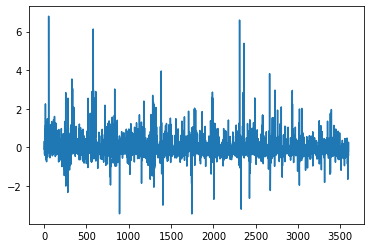

In [37]:
import matplotlib.pyplot as plt
plt.plot(model.resid)

In [41]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [42]:
sms.jarque_bera(model.resid)

(82278.37352336984, 0.0, 2.440420535640875, 25.912982885268615)

In [44]:
sms.het_breuschpagan(model.resid, model.model.exog)

(609.0703093100485,
 1.5287254144500244e-112,
 30.337060982388778,
 6.612592440140445e-125)

# RFE

In [40]:
df1.revenue1.hist(bins=5)

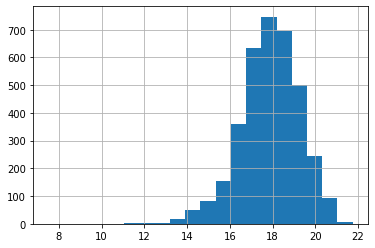

In [41]:
np.log(df1.revenue1).hist(bins=20)

In [42]:
y = np.log(df1.revenue1)
y= round((y-y.mean())/y.std(), 2)
y.shape

(3598,)

In [43]:
X = df1.drop('revenue1', axis =1)
X.shape

(3598, 40)

In [44]:
X.budget1= round(np.log(df1.budget1),2)
X.popularity=round(X.popularity, 2)

/anaconda3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [45]:
reg = LinearRegression()
rfe = RFE(reg,15)

In [46]:
rfe = rfe.fit(X,y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# OLS - spliting test and train

In [52]:
from sklearn.model_selection import train_test_split

In [148]:
df1.astype(int, inplace=True)

,const,Production,Animation,Comedy,Family,Adventure,Fantasy,Romance,Drama,Action,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,1,4,0,1,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,4,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,4,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,4,0,0,0,1,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
4,1,4,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
5,1,4,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6,1,4,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
7,1,4,0,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
8,1,4,0,1,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
9,1,4,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [149]:
col_to_std = df1.nunique()[df1.nunique()>10].index.to_list() 
df1[col_to_std] = (df1[col_to_std]-df1[col_to_std].mean())/df1[col_to_std].std()
df1 = add_constant(df1)

In [150]:
X_train, X_test, y_train, y_test= train_test_split(df1.drop('revenue1', axis =1), df1.revenue1, 
                                                   test_size=0.3, random_state=11)

In [151]:
import statsmodels.api as sm

In [153]:
model = sm.OLS(y_train,X_train.astype(int))

In [154]:
model = model.fit()

In [155]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               revenue1   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     135.2
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        15:14:47   Log-Likelihood:                -2026.8
No. Observations:                2518   AIC:                             4132.
Df Residuals:                    2479   BIC:                             4359.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.5861      0.063     -9.316      0.000      -0.709      -0.463
Production          0.0354      0.010      3.510      0.000       0.016       0.055
Animation           0.3289      0.058      5.640      0.000       0.215       0.443
Comedy             -0.0570      0.028     -2.004      0.045      -0.113      -0.001
Family              0.0975      0.043      2.284      0.022       0.014       0.181
Adventure           0.1224      0.035      3.539      0.000       0.055       0.190
Fantasy             0.0649      0.038      1.721      0.085      -0.009       0.139
Romance             0.1252      0.031      3.990      0.000       0.064       0.187
Drama              -0.1596      0.028     -5.743      0.000      -0.214      -0.105
Action              0.0360      0.031      1.151      0.250      -0.025       0.097
Crime              -0.0329      0.034     -0.980      0.327      -0.099       0.033
Thriller           -0.0293      0.031     -0.940      0.347      -0.090       0.032
Horror             -0.0189      0.041     -0.467      0.640      -0.098       0.061
History             0.0159      0.069      0.230      0.818      -0.120       0.152
Science Fiction    -0.1072      0.038     -2.785      0.005      -0.183      -0.032
Mystery             0.0103      0.043      0.240      0.810      -0.074       0.094
War                 0.0853      0.071      1.210      0.227      -0.053       0.224
Music               0.1010      0.061      1.669      0.095      -0.018       0.220
Foreign            -0.1006      0.210     -0.479      0.632      -0.512       0.311
Western            -0.2558      0.095     -2.705      0.007      -0.441      -0.070
Documentary        -0.1577      0.115     -1.369      0.171      -0.383       0.068
TV Movie        -1.166e-16   2.48e-16     -0.469      0.639   -6.04e-16    3.71e-16
budget1             0.5538      0.021     26.349      0.000       0.513       0.595
Cast 1              0.1008      0.023      4.463      0.000       0.057       0.145
Cast 2              0.0886      0.024      3.646      0.000       0.041       0.136
adult            2.078e-17   4.24e-17      0.490      0.625   -6.25e-17    1.04e-16
popularity          0.0672      0.012      5.822      0.000       0.045       0.090
vote_average        0.0399      0.018      2.211      0.027       0.005       0.075
vote_count          0.5525      0.019     29.729      0.000       0.516       0.589
Age                -0.1074      0.017     -6.429      0.000      -0.140      -0.075
Month_2             0.0097      0.062      0.157      0.876      -0.112       0.131
Month_3             0.0252      0.060      0.420      0.675      -0.092       0.143
Month_4             0.0836      0.060      1.389      0.165      -0.034       0.202
Month_5             0.1309      0.060      2.198      0.028

In [156]:
def reg(X,y=y_train):
    model=sm.OLS(y,X.astype(int))
    model_fit = model.fit()
    print(model_fit.summary())

In [157]:
X_train=X_train.drop('Comedy', axis=1)
reg(X_train)

                            OLS Regression Results                            
Dep. Variable:               revenue1   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     138.5
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        15:15:09   Log-Likelihood:                -2028.9
No. Observations:                2518   AIC:                             4134.
Df Residuals:                    2480   BIC:                             4355.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.6277      0.059    -

In [158]:
X_train=X_train.drop('Fantasy', axis=1)
reg(X_train)

                            OLS Regression Results                            
Dep. Variable:               revenue1   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     142.1
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        15:15:10   Log-Likelihood:                -2030.6
No. Observations:                2518   AIC:                             4135.
Df Residuals:                    2481   BIC:                             4351.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.6230      0.059    -

In [159]:
X_train=X_train.drop('Action', axis=1)
reg(X_train)

                            OLS Regression Results                            
Dep. Variable:               revenue1   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     146.1
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        15:15:10   Log-Likelihood:                -2031.6
No. Observations:                2518   AIC:                             4135.
Df Residuals:                    2482   BIC:                             4345.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.6126      0.059    -

In [160]:
X_train=X_train.drop('Horror', axis=1)
reg(X_train)

                            OLS Regression Results                            
Dep. Variable:               revenue1   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     150.4
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        15:15:10   Log-Likelihood:                -2031.7
No. Observations:                2518   AIC:                             4133.
Df Residuals:                    2483   BIC:                             4337.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.6152      0.057    -

In [161]:
X_train=X_train.drop(['Mystery','War','Music'], axis=1)
reg(X_train)

                            OLS Regression Results                            
Dep. Variable:               revenue1   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     164.7
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        15:15:11   Log-Likelihood:                -2034.2
No. Observations:                2518   AIC:                             4132.
Df Residuals:                    2486   BIC:                             4319.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.6069      0.057    -

In [162]:
X_train=X_train.drop('Foreign', axis=1)
reg(X_train)

                            OLS Regression Results                            
Dep. Variable:               revenue1   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     170.2
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        15:15:11   Log-Likelihood:                -2034.3
No. Observations:                2518   AIC:                             4131.
Df Residuals:                    2487   BIC:                             4311.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.6089      0.057    -

In [163]:
X_train=X_train.drop(['Cast 1','Cast 2'], axis=1)
reg(X_train)

                            OLS Regression Results                            
Dep. Variable:               revenue1   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     178.0
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        15:15:11   Log-Likelihood:                -2055.4
No. Observations:                2518   AIC:                             4169.
Df Residuals:                    2489   BIC:                             4338.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.4584      0.053     

In [164]:
X_train=X_train.drop(['TV Movie'], axis=1)
reg(X_train)

                            OLS Regression Results                            
Dep. Variable:               revenue1   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     178.0
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        15:15:12   Log-Likelihood:                -2055.4
No. Observations:                2518   AIC:                             4169.
Df Residuals:                    2489   BIC:                             4338.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.4584      0.053     

In [165]:
X_train=X_train.drop(['Production'], axis=1)
reg(X_train)

                            OLS Regression Results                            
Dep. Variable:               revenue1   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     182.9
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        15:15:12   Log-Likelihood:                -2063.7
No. Observations:                2518   AIC:                             4183.
Df Residuals:                    2490   BIC:                             4347.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.3769      0.049     

In [174]:
X_train=X_train.drop(['Month_3','Month_4','Month_8','Month_9','Month_10'], axis=1)
reg(X_train)

                            OLS Regression Results                            
Dep. Variable:               revenue1   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     235.0
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        15:18:40   Log-Likelihood:                -2066.1
No. Observations:                2518   AIC:                             4176.
Df Residuals:                    2496   BIC:                             4304.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.3304      0.024    -

In [175]:
X_train=X_train.drop(['adult'], axis=1)
reg(X_train)

                            OLS Regression Results                            
Dep. Variable:               revenue1   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     235.0
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        15:19:16   Log-Likelihood:                -2066.1
No. Observations:                2518   AIC:                             4176.
Df Residuals:                    2496   BIC:                             4304.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.3304      0.024    -

In [176]:
X_train=X_train.drop(['Crime','Thriller','History'], axis=1)
reg(X_train)

                            OLS Regression Results                            
Dep. Variable:               revenue1   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     274.4
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        15:20:10   Log-Likelihood:                -2066.5
No. Observations:                2518   AIC:                             4171.
Df Residuals:                    2499   BIC:                             4282.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.3267      0.021    -

In [177]:
model=sm.OLS(y_train,X_train.astype(int))
model_fit = model.fit()

In [178]:
X_train.columns

Index(['const', 'Animation', 'Family', 'Adventure', 'Romance', 'Drama',
       'Science Fiction', 'Western', 'Documentary', 'budget1', 'popularity',
       'vote_average', 'vote_count', 'Age', 'Month_5', 'Month_6', 'Month_7',
       'Month_11', 'Month_12'],
      dtype='object')

In [180]:
X_test = X_test[['const', 'Animation', 'Family', 'Adventure', 'Romance', 'Drama',
       'Science Fiction', 'Western', 'Documentary', 'budget1', 'popularity',
       'vote_average', 'vote_count', 'Age', 'Month_5', 'Month_6', 'Month_7',
       'Month_11', 'Month_12']]

In [181]:
pred=model_fit.predict(X_test)

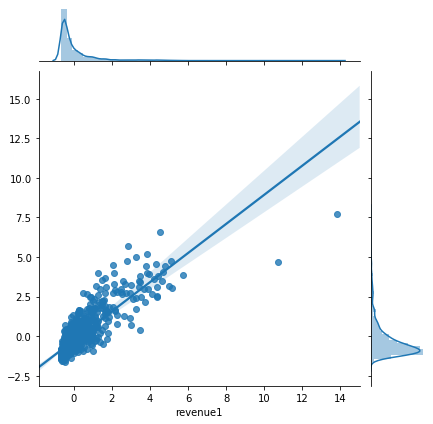

In [182]:
sns.jointplot(y_test,pred, kind='reg')